# Image Generator service from list of NDEx IDs

In [11]:
import requests
import json
from PIL import Image
from IPython.display import Image, SVG

# BASE = 'http://192.168.99.100:3001/'

# AWS
BASE = 'http://52.88.64.154:3001/'

# NDEx Development server
NDEX = 'http://dev2.ndexbio.org/rest/'

res = requests.get(BASE)
print(json.dumps(res.json(), indent=4))

{
    "apiVersion": "v1",
    "buildVersion": "0.1.2",
    "description": "Generate image from list of NDEx IDs",
    "serviceName": "Image generator queue"
}


In [12]:
# Get list of public networks
search_q = {
    'searchString': '*'
}
res = requests.post(NDEX + 'network/search/0/10', json=search_q)
network_list = res.json()
ids = [x['externalId'] for x in network_list]

print( ids)

['602da31f-bfd9-11e5-8de3-0251251672f9', '9b0720fe-bfa6-11e5-8de3-0251251672f9', '18fb06bb-bbe4-11e5-a554-0251251672f9', '18409059-bbe4-11e5-a554-0251251672f9']


In [13]:
q = {
    "ids": ids
}

res = requests.post(BASE+'generator', json=q)
image_urls = res.json()['image_urls']
image_urls

['http://52.32.158.148/image/602da31f-bfd9-11e5-8de3-0251251672f9',
 'http://52.32.158.148/image/9b0720fe-bfa6-11e5-8de3-0251251672f9',
 'http://52.32.158.148/image/18fb06bb-bbe4-11e5-a554-0251251672f9',
 'http://52.32.158.148/image/18409059-bbe4-11e5-a554-0251251672f9']

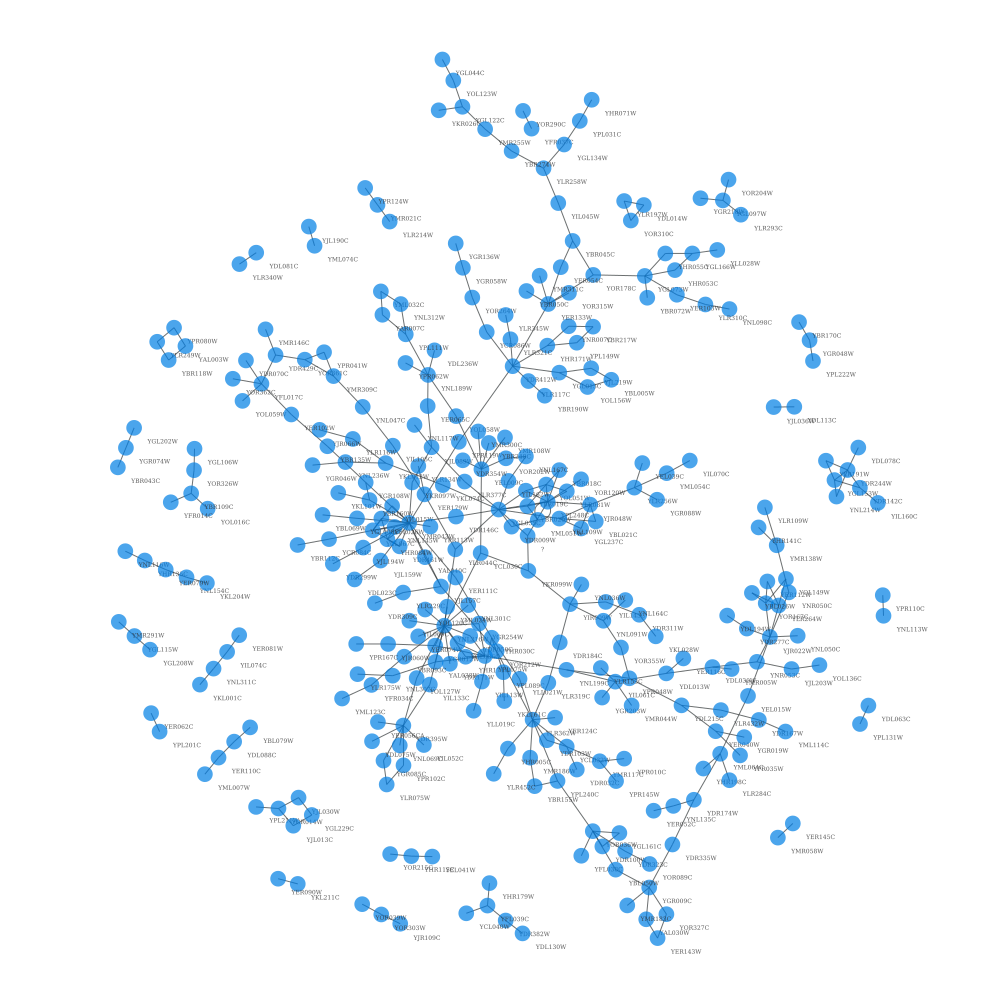

In [16]:
from IPython.display import Image, SVG

image_data = []
for url in image_urls:
    res = requests.get(url)
    image_data.append(res.content)

SVG(data=image_data[1])

In [ ]:
# This fails! (401)
res = requests.get(NDEX+'network/' + private_net1 + '/asCX')
res

## Access private networks

In [ ]:
q3 = {
    "ids": [private_net1, 'c51ebcc8-b336-11e5-b3f0-0251251672f9'],
    "credential": {
        "id": "keiono",
        "password": ''
    }
}


res = requests.post(BASE+'generator', json=q3)
res

# S3 client test

In [ ]:
import boto3
import uuid

s3client = boto3.client('s3')

bucket_name = 'ci-service-data'
print('Bucket name: {}'.format(bucket_name))

data = open('test1.svg', 'rb')

s3client.put_object(Bucket=bucket_name, Key="images/test1.svg", Body=data)

# Test Image Cache

In [ ]:
# POST image

import binascii

id1 = '9b0720fe-bfa6-11e5-8de3-0251251672f0'

IMAGE_CACHE = "http://52.32.158.148/image/"

with  open('test1.svg', 'r') as f:
    img = f.read()

d2 = binascii.a2b_qp(img)

res2 = requests.post(IMAGE_CACHE+'svg/'+ id1, data=d2)

res2.json()

In [ ]:
from IPython.core.display import HTML

res = requests.get(IMAGE_CACHE+id1)
SVG(data=res.content)